# data science
**About dataset**
<h4> dataset_train.csv</h4>
<h4>dataset_test.csv</h4>
* datetime​­ : date et heure du relevé
* season​­ : 1 = printemps , 2 = été, 3 = automne, 4 = hiver
* holiday : indique si le jour est un jour de vacances scolaires
* workingday​­ : indique si le jour est travaillé (ni week­end ni vacances)
* weather​­ : 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neige
* temp​ : température en degrés Celsius
* atemp​ : température ressentie en degrés Celsius
* humidity​ : taux d'humidité
* windspeed​ : vitesse du vent
* casual​­ : nombre de ventes d'usagers non abonnés
* registered​ : nombre de ventes d'usagers abonnés
* count​ : nombre total de ventes de rollers**

## Objective of the dataset:
To get a better understanding of the data and also to predict future sales.

The Language used in the notebook is Python of the plots are done using plotly and so will be interactive. Please feel free to hover over the plots to get more insights.

Let us first import the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime
import warnings
warnings.filterwarnings("ignore")

Let us list down the files present in this data and also take a look at the top few rows of the files.

In [2]:
#Read dataset
df=pd.read_csv("dataset_train.csv",delimiter=";" ,encoding='utf-8')
df["datetime"] = pd.to_datetime(df["datetime"],format='%Y-%m-%d %H:%M:%S')
df = df.sort_values("datetime")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3452,2011-01-01 00:00:00,1,0.0,0.0,1.0,9.84,14.395,81,0.0,3.0,13.0,16
1207,2011-01-01 01:00:00,1,0.0,0.0,1.0,9.02,13.635,80,0.0,8.0,32.0,40
4133,2011-01-01 02:00:00,1,0.0,0.0,1.0,9.02,13.635,80,0.0,5.0,27.0,32
8252,2011-01-01 03:00:00,1,0.0,0.0,1.0,9.84,14.395,75,0.0,3.0,10.0,13
4411,2011-01-01 04:00:00,1,0.0,0.0,1.0,9.84,14.395,75,0.0,0.0,1.0,1


We counted the null values in the dataset, we found that there are null values in some of the columns.

In [3]:
# Looking for nulls
print(df.isnull().any())
# Inspecting type
print(df.dtypes)

datetime      False
season         True
holiday        True
workingday     True
weather        True
temp          False
atemp         False
humidity      False
windspeed     False
casual         True
registered     True
count         False
dtype: bool
datetime      datetime64[ns]
season                object
holiday              float64
workingday           float64
weather              float64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                  int64
dtype: object


We count the percentage of null values, and decide to clean data。

In [4]:
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
column type,datetime64[ns],object,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64
null values (nb),0,268,73,131,53,0,0,0,0,6,2,0
null values (%),0,2.46188,0.670586,1.20338,0.486864,0,0,0,0,0.0551167,0.0183722,0


In [5]:
#clean workingday
df.loc[df['holiday'] == 1,'workingday']= 0  

In [6]:
#clean season
df["season"].fillna(method="pad", inplace = True)

1. The relationship between season and sales
================================================

In [7]:
df_season = df[["datetime","season","casual","registered","count"]].dropna()

In [8]:
df_season_2011 = df_season[df_season["datetime"].dt.year == 2011]
df_season_2011 = df_season_2011.replace({"season":{"Mist":1,"1":1,"1.5":1,"1.0":1,"2":2,"2.0":2,"3":3,"3.0":3,"4":4,"4.0":4,"-2":2}})
df_season_2011 = df_season_2011.groupby("season").sum().reset_index()
df_season_2011

,season,casual,registered,count
0,1,14133.0,82895.0,97028
1,2,47248.0,170634.0,217882
2,3,62036.0,193212.0,255248
3,4,32393.0,179201.0,211594


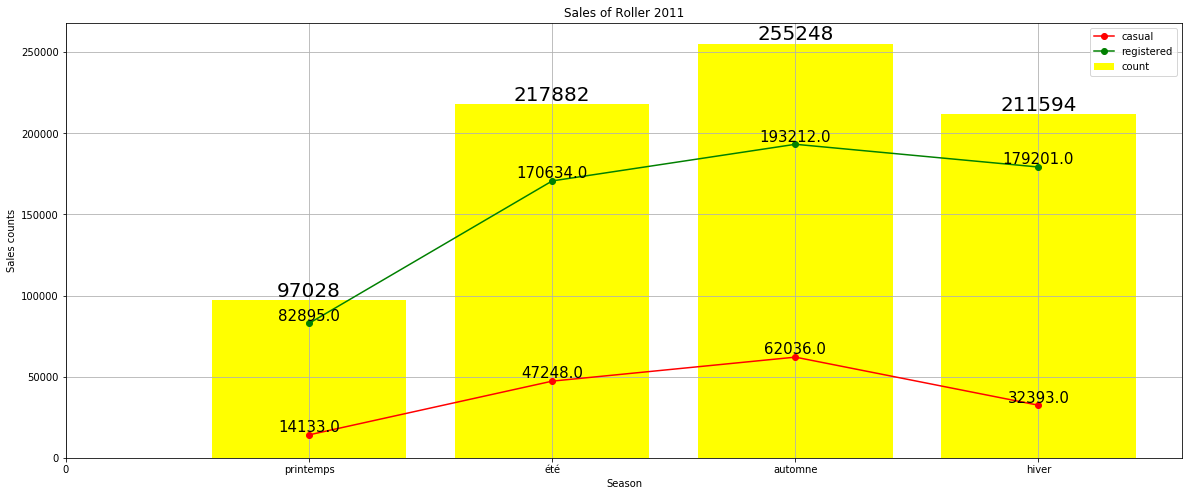

In [9]:
plt.figure(figsize=(20,8))
plt.title('Sales of Roller 2011')
plt.xlabel('Season')
plt.ylabel('Sales counts')
plt.plot(df_season_2011["season"],df_season_2011["casual"],label="casual",marker='o',color="red")
for a, b in zip(df_season_2011["season"], df_season_2011["casual"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)  
    
plt.plot(df_season_2011["season"],df_season_2011["registered"], label = "registered",marker='o',color="green")
for a, b in zip(df_season_2011["season"], df_season_2011["registered"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)  
    
plt.bar(df_season_2011["season"], df_season_2011["count"],color="yellow",label = "count")
for a, b in zip(df_season_2011["season"], df_season_2011["count"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=20)  
plt.xticks(range(5),[0,"printemps","été","automne","hiver"])     
plt.grid(True)
plt.legend()
plt.show()

In [10]:
df_season_2012 = df_season[df_season["datetime"].dt.year == 2012]
df_season_2012 = df_season_2012.replace({"season":{"Mist":1,"1":1,"1.5":1,"1.0":1,"2":2,"2.0":2,"3":3,"3.0":3,"4":4,"4.0":4,"-2":2}})
df_season_2012 = df_season_2012.groupby("season").sum().reset_index()
df_season_2012

,season,casual,registered,count
0,1,28194.0,191124.0,219318
1,2,81693.0,284571.0,366264
2,3,80682.0,304732.0,385414
3,4,45747.0,286693.0,332440


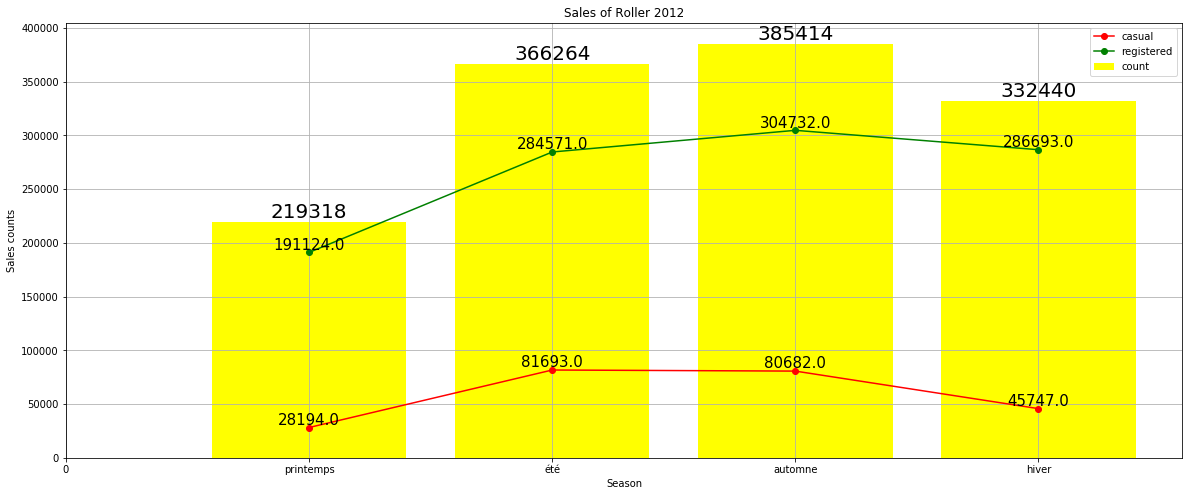

In [11]:
plt.figure(figsize=(20,8))
plt.title('Sales of Roller 2012')
plt.xlabel('Season')
plt.ylabel('Sales counts')
plt.plot(df_season_2012["season"],df_season_2012["casual"],label="casual",marker='o',color="red")
for a, b in zip(df_season_2012["season"], df_season_2012["casual"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)  
    
plt.plot(df_season_2012["season"],df_season_2012["registered"], label = "registered",marker='o',color="green")
for a, b in zip(df_season_2012["season"], df_season_2012["registered"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)  
    
plt.bar(df_season_2012["season"], df_season_2012["count"],color="yellow",label = "count")
for a, b in zip(df_season_2012["season"], df_season_2012["count"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=20)  
plt.xticks(range(5),[0,"printemps","été","automne","hiver"])      
plt.grid(True)
plt.legend()
plt.show()

2. The relationship between Month and sales
================================================

In [12]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df_time_month = df[["year","month","casual","registered","count"]].dropna()
df_time_month = df_time_month.groupby(["year","month"]).sum().reset_index()
df_time_month.head()

,year,month,casual,registered,count
0,2011,1,2006.0,21345.0,23351
1,2011,2,3771.0,29047.0,32818
2,2011,3,7910.0,30825.0,38735
3,2011,4,12229.0,38288.0,50517
4,2011,5,15865.0,63848.0,79713


In [13]:
df_time_month_2011 = df_time_month[df_time_month["year"]==2011]
df_time_month_2012 = df_time_month[df_time_month["year"]==2012]


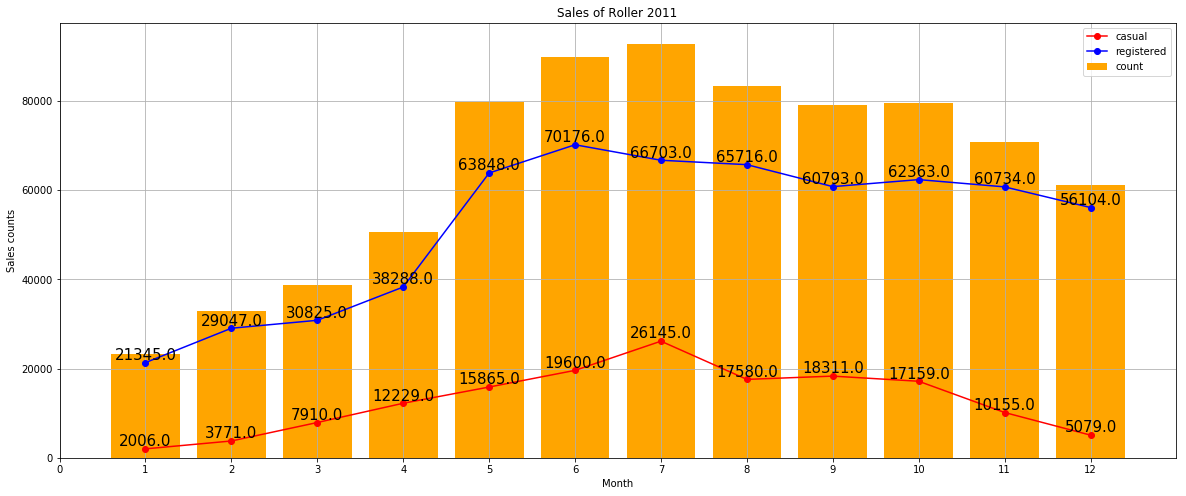

In [14]:
plt.figure(figsize=(20,8))
plt.title('Sales of Roller 2011')
plt.xlabel('Month')
plt.ylabel('Sales counts')
plt.plot(df_time_month_2011["month"],df_time_month_2011["casual"],label="casual",marker='o',color="red")
plt.plot(df_time_month_2011["month"],df_time_month_2011["registered"],label="registered",marker='o',color="blue")
plt.bar(df_time_month_2011["month"],df_time_month_2011["count"],label="count",color="orange")
for a, b in zip(df_time_month_2011["month"], df_time_month_2011["casual"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15) 
for a, b in zip(df_time_month_2011["month"], df_time_month_2011["registered"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)

plt.xticks(range(13))      
plt.grid(True)
plt.legend()
plt.show()

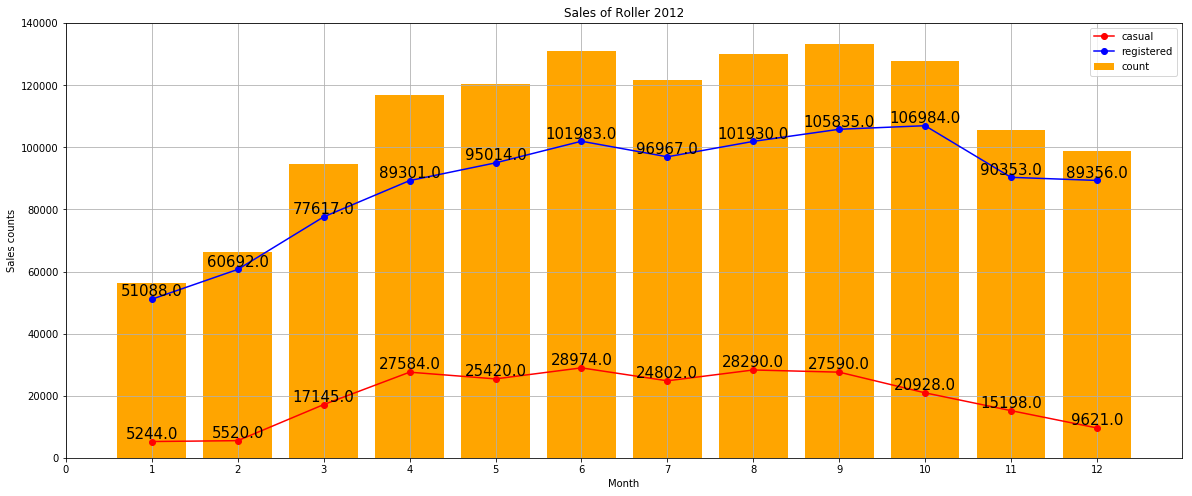

In [15]:
plt.figure(figsize=(20,8))
plt.title('Sales of Roller 2012')
plt.xlabel('Month')
plt.ylabel('Sales counts')
plt.plot(df_time_month_2012["month"],df_time_month_2012["casual"],label="casual",marker='o',color="red")
plt.plot(df_time_month_2012["month"],df_time_month_2012["registered"],label="registered",marker='o',color="blue")
plt.bar(df_time_month_2012["month"],df_time_month_2012["count"],label="count",color="orange")
for a, b in zip(df_time_month_2012["month"], df_time_month_2012["casual"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15) 
for a, b in zip(df_time_month_2012["month"], df_time_month_2012["registered"]):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
plt.xticks(range(13))      
plt.grid(True)
plt.legend()
plt.show()

3. The relationship between weather and sales
================================================

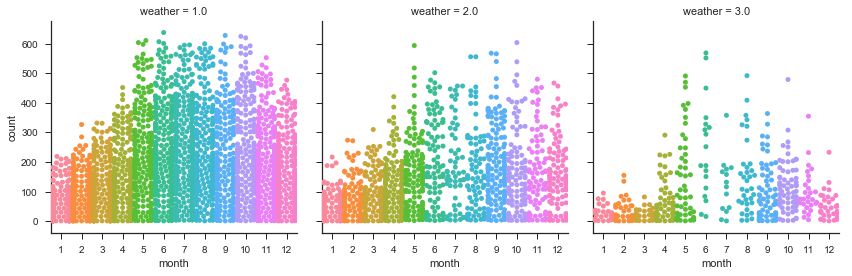

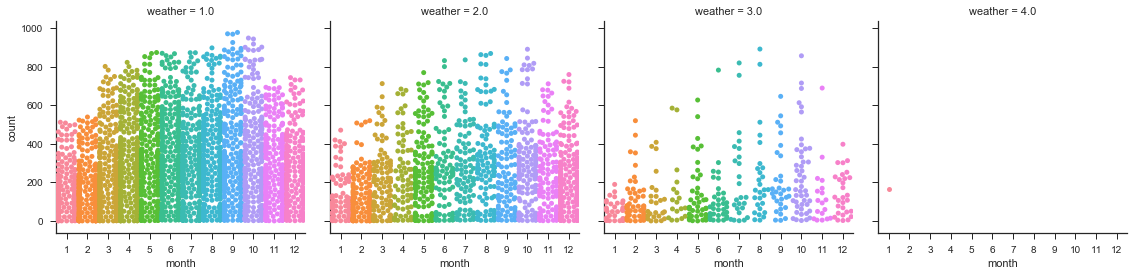

In [16]:
# weather
df_weather = df[["year","month","weather","count"]].dropna()
df_weather_2011 = df_weather[df_weather["year"]==2011]
df_weather_2012 = df_weather[df_weather["year"]==2012]
sns.set(style="ticks")
sns.factorplot(data=df_weather_2011, x="month", y="count", col="weather" ,kind ="swarm")
sns.factorplot(data=df_weather_2012, x="month", y="count", col="weather",kind ="swarm")
plt.show()

4. Daily sales heat map
================================================

In [17]:
df_time_day = df[["year","month","casual","day","registered","count"]].dropna()
df_time_day = df_time_day.groupby(["year","month","day"]).sum().reset_index()
df_time_day.head()

,year,month,day,casual,registered,count
0,2011,1,1,331.0,654.0,985
1,2011,1,2,131.0,670.0,801
2,2011,1,3,120.0,1229.0,1349
3,2011,1,4,108.0,1454.0,1562
4,2011,1,5,82.0,1518.0,1600


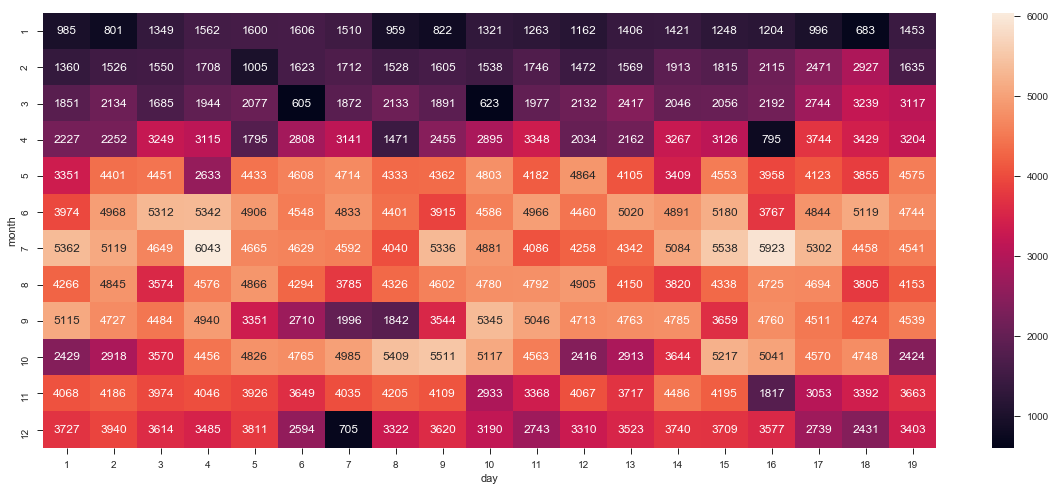

In [18]:
df_time_day_2011 = df_time_day[df_time_day["year"]==2011].pivot("month","day","count")
plt.figure(figsize=(20,8))
sns.heatmap(df_time_day_2011, annot=True, fmt='d')

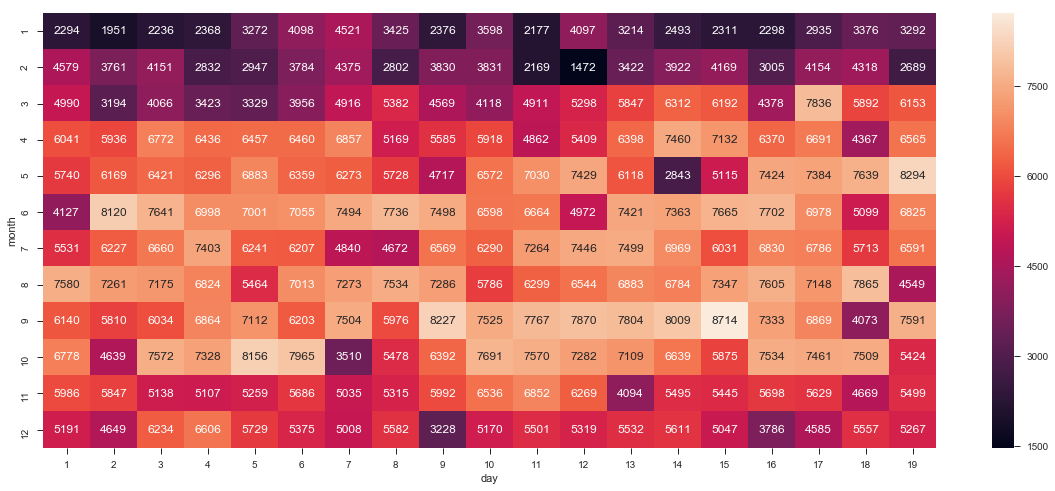

In [19]:
df_time_day_2012 = df_time_day[df_time_day["year"]==2012].pivot("month","day","count")
plt.figure(figsize=(20,8))
sns.heatmap(df_time_day_2012, annot=True, fmt='d')

5. Other factors analysis
================================================

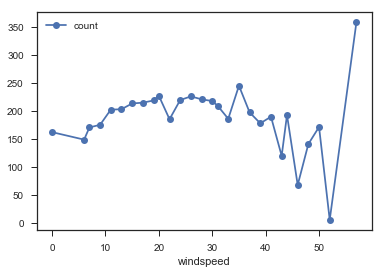

In [23]:
# windspeed
df.dropna().groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

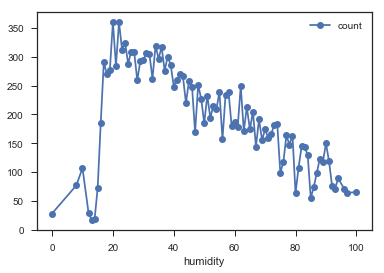

In [24]:
# humidity
df.dropna().groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

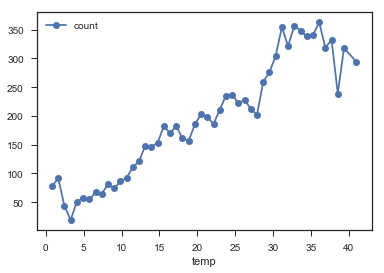

In [26]:
# temp
df.dropna().groupby('temp').mean().plot(y='count', marker='o')
plt.show()

6. Correlation Analysis
================================================

In [21]:
corr = df[['temp','weather','windspeed','day', 'month', 'hour','count']].dropna().corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.058582,-0.016954,0.015605,0.252554,0.145467,0.394069
weather,-0.058582,1.000000,0.008171,-0.007473,0.007842,-0.022884,-0.129893
windspeed,-0.016954,0.008171,1.000000,0.035690,-0.149467,0.146599,0.101698
day,0.015605,-0.007473,0.035690,1.000000,0.002727,0.001912,0.020135
month,0.252554,0.007842,-0.149467,0.002727,1.000000,-0.006928,0.165895
hour,0.145467,-0.022884,0.146599,0.001912,-0.006928,1.000000,0.401092
count,0.394069,-0.129893,0.101698,0.020135,0.165895,0.401092,1.000000


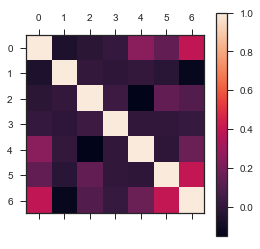

In [30]:
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()

# 6.ECDF: empirical cumulative distribution function
To get the first impression about continious variables in the data we can plot ECDF.

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 12))

df_test = df.dropna()
plt.subplot(311)
cdf = ECDF(df_test['count'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Total sales')
plt.ylabel('ECDF')

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(df_test['casual'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Casual sales')

# plot third ECDF  
plt.subplot(313)
cdf = ECDF(df_test['registered'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Registered sales')

# Machine Learning
We use random forest algorithm to predict sales

## Why Random Forest algorithm?
It can be used for both classification and regression tasks, if there are enough trees in the forest, the classifier won’t overfit the model. The third advantage is the classifier of Random Forest can handle missing values, and the last advantage is that the Random Forest classifier can be modeled for categorical values.

In [ ]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_train_count = df.replace({"season":{"Mist":1,"1":1,"1.5":1,"1.0":1,"2":2,"2.0":2,"3":3,"3.0":3,"4":4,"4.0":4,"-2":2}}).drop(['datetime','casual','registered'], axis = 1).dropna()
df_train_target_count = df_train_count['count'].values
df_train_data_count = df_train_count.drop(['count'],axis = 1).values
print('df_train_data_count shape is ', df_train_data_count.shape)
print('df_train_target_count shape is ', df_train_target_count.shape) 

In [ ]:
# split the data 
cv = cross_validation.ShuffleSplit(len(df_train_data_count), n_iter=3, test_size=0.2,
    random_state=0)
  
print ("Random Forest(n_estimators = 500)")    
for train, test in cv:    
    svc_count = RandomForestRegressor(n_estimators = 500).fit(df_train_data_count[train], df_train_target_count[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc_count.score(df_train_data_count[train], df_train_target_count[train]), svc_count.score(df_train_data_count[test], df_train_target_count[test])))

In [ ]:
df_train_casual = df.replace({"season":{"Mist":1,"1":1,"1.5":1,"1.0":1,"2":2,"2.0":2,"3":3,"3.0":3,"4":4,"4.0":4,"-2":2}}).drop(['datetime','count','registered'], axis = 1).dropna()
df_train_target_casual = df_train_casual['casual'].values
df_train_data_casual = df_train_casual.drop(['casual'],axis = 1).values
cv = cross_validation.ShuffleSplit(len(df_train_data_casual), n_iter=3, test_size=0.2,
    random_state=0)
for train, test in cv:    
    svc_casual = RandomForestRegressor(n_estimators = 500).fit(df_train_data_casual[train], df_train_target_casual[train])

In [ ]:
df_train_registered = df.replace({"season":{"Mist":1,"1":1,"1.5":1,"1.0":1,"2":2,"2.0":2,"3":3,"3.0":3,"4":4,"4.0":4,"-2":2}}).drop(['datetime','count','casual'], axis = 1).dropna()
df_train_target_registered = df_train_registered['registered'].values
df_train_data_registered = df_train_registered.drop(['registered'],axis = 1).values
cv = cross_validation.ShuffleSplit(len(df_train_data_registered), n_iter=3, test_size=0.2,
    random_state=0)
for train, test in cv:    
    svc_registered = RandomForestRegressor(n_estimators = 500).fit(df_train_data_registered[train], df_train_target_registered[train])

In [ ]:
data_test = pd.read_csv("dataset_test.csv" ,encoding='utf-8')
data_test["datetime"] = pd.to_datetime(data_test["datetime"],format='%Y-%m-%d %H:%M:%S')
data_test["year"] = data_test["datetime"].dt.year
data_test["month"] = data_test["datetime"].dt.month
data_test["day"] = data_test["datetime"].dt.day
data_test["hour"] = data_test["datetime"].dt.hour

In [ ]:
data_test_target = data_test.drop(columns="datetime")
data_test["casual"]=np.round(svc_casual.predict(data_test_target))
data_test["registered"]=np.round(svc_registered.predict(data_test_target))
data_test["count"]=np.round(svc_count.predict(data_test_target))
data_test.drop(columns =["year","month","hour","day"],inplace=True)

# Export our predict results

In [ ]:
data_test.to_csv("data_test_result.csv", sep='\t', encoding='utf-8')